## TECHIN 513 HW1 – Modifying Signals

Freya Yu 2372732

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import simpleaudio as sa
from scipy.signal import resample
from scipy import signal
import decimal 
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week hw.  You should plan on completing the first 2 assignments in the first week.

## HW 1 turn in checklist

•	your Jupyter or Colab notbooks (uploaded as .pdf with your outputs).

Note: You can work together but you need to submit your own work. do not copy paste from each other


In [2]:
# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

## Assignment 1 -- Working with sound files

In [3]:
# input and output variables:

# x1: signal from "train32.wav"
# fs1: sampling rate

In [4]:

# Part A: Reading the Sound File

fs1, x1 = wav.read('train32.wav')
print("Sampling Rate:", fs1)
print("Number of Samples:", len(x1))
print("Type:", x1.dtype)


Sampling Rate: 32000
Number of Samples: 50313
Type: int16


In [5]:
# Part B: Resampling and Saving

from scipy.signal import resample
wav.write('train_half.wav', fs1//2, x1)
wav.write('train_1_5_times.wav', int(fs1*1.5), x1)


In [6]:
# Part C: Playing Audio

def play_audio(file):
    wave_obj = sa.WaveObject.from_wave_file(file)
    play_obj = wave_obj.play()
    play_obj.wait_done()

play_audio('train32.wav')
play_audio('train_half.wav')
play_audio('train_1_5_times.wav')

###  Discussion

The first file is the same as the original.
The second file has a reduced sampling rate, reducing the frequency of the sound wave and making it lower heavy.
The third file has an increased sampling rate, resulting in a high frequency so more high pitched.

No sampling frequency change so no spped change.


## Assignment 2 -- Amplitude Operations on Signals

In [7]:
# input and output variables:

# x1: signal from "train32.wav"
# fs1: sampling rate
# len1 = Sample Length of the data x1

In [8]:
# Part A

fs1, x1 = wav.read('train32.wav')

n0 = int(0.5 * fs1)  
s1 = np.concatenate((np.ones(n0), 0.2 * np.ones(len(x1) - n0)))

v1 = s1 * x1

wav.write('v1.wav', fs1, v1.astype(np.int16))


In [9]:
# Part B

r1 = np.linspace(1, 0, num=len(x1))

v2 = r1 * x1

wav.write('v2.wav', fs1, v2.astype(np.int16))

In [10]:
# Part C

play_audio('v1.wav')
play_audio('v2.wav')


###  Discussion


The signal s1 is a step function that takes the value 1 for the time interval [0, 0.5] and the value 0.2 for t > 0.5. When multiplied with the train sound signal x1 to create v1, it essentially attenuates the signal after the first 0.5 seconds. The signal becomes quieter (suddenly) after this point.

If we define s1 to take the value 2 for the [0, 0.5] range, it would act as an amplification during that time interval, making the signal louder for the first 0.5 seconds.

The signal r1 is a decaying ramp signal that starts with the value 1 at time 0 and linearly decays to 0. When multiplied with the train sound signal x1 to create v2, it introduces a linear decay in the amplitude of the train sound over time. The signal gradually becomes quieter.

If we wanted a smooth but faster decay in amplitude, we might use the decay signal.

## Assignment 3 -- Time Scaling Audio Signals 

In [11]:
# input and output variables:

# x1: signal from "train32.wav"
# fs1: sampling rate
# w: w(t)=x1(2t)
# v: v(t)=x1(0.5t)


In [12]:
# Part A: Time Scale Function

def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = signal.resample_poly([float(i) for i in x], d, n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t

In [13]:
# Part B: Time Scaling w(t)=x1(2t) and v(t)=x1(0.5t)

x, t_x = timescale(x1, fs1, 1)

# a. Create w(t) using a=2
w, t_w = timescale(x1, fs1, 2)

# b. Create v(t) using a=0.5
v, t_v = timescale(x1, fs1, 0.5)

# c. Create a time-reversed version of the signal z(t) = x1(-t)
z = x1[::-1]
t_z = t_x

# d. Save the resulting signal z(t) to a wav file
wav.write('z_sig.wav', fs1, z.astype(np.int16))


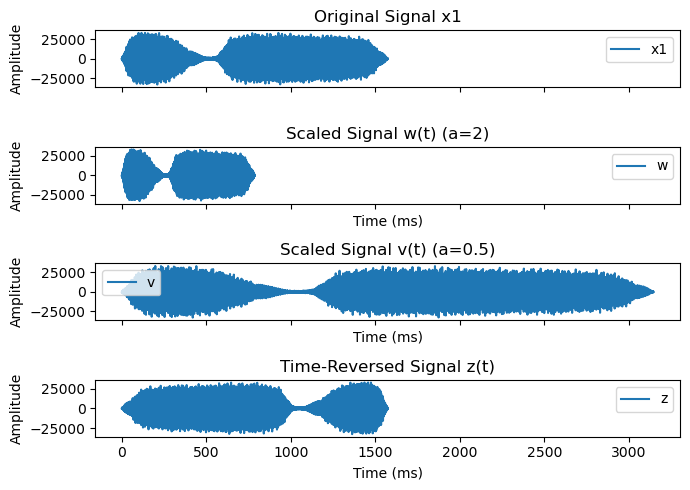

In [14]:
# Part C: Plotting

x, t_x = timescale(x1, fs1, 1)

fig, axs = plt.subplots(4, 1, sharex=True, figsize=(7, 5))

# Plot x1
axs[0].plot(t_x * 1000, x1, label='x1')
axs[0].set_title('Original Signal x1')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Plot w
axs[1].plot(t_w * 1000, w, label='w')
axs[1].set_title('Scaled Signal w(t) (a=2)')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# Plot v
axs[2].plot(t_v * 1000, v, label='v')
axs[2].set_title('Scaled Signal v(t) (a=0.5)')
axs[2].set_xlabel('Time (ms)')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

# Plot z
axs[3].plot(t_z * 1000, z, label='z')
axs[3].set_title('Time-Reversed Signal z(t)')
axs[3].set_xlabel('Time (ms)')
axs[3].set_ylabel('Amplitude')
axs[3].legend()

wav.write('w.wav', fs1, w.astype(np.int16))
wav.write('v.wav', fs1, v.astype(np.int16))
wav.write('z.wav', fs1, z.astype(np.int16))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Part D: Playing Audio

play_audio('train32.wav')
play_audio('w.wav')
play_audio('v.wav')
play_audio('z.wav')

###  Discussion

If the figure command is run before every call to subplot, it will create a new figure for each subplot. Each subplot will be displayed in a separate figure. The figures may appear in separate windows or areas, and they won't share the same layout.

## Assignment 4 -- Time Shift Operations

In [16]:
# input and output variables:

# x1: signal from "train32.wav"
# fs1: sampling rate
# t_y: time samples vector corresponding to y: scaled signal
# y: scaled signal
# x1_shift_05: signal from "train32.wav" shifted by 0.5 seconds
# x1_shift_1: signal from "train32.wav" shifted by 1 second


In [17]:
# Part A: Timeshift Function

def timeshift(x, fs, t0):
    # Find the integer shift n0
    n0 = int(np.round(t0 * fs))

    # Check if the time shift is positive or negative
    if n0 >= 0:
        # For a time delay, concatenate a zero vector with the original signal
        y = np.concatenate((np.zeros(n0), x))
    else:
        # For a time advance, copy the portion of the signal and append zeroes
        y = x[-n0:]
        y = np.concatenate((y, np.zeros(-n0)))

    # Create a time vector corresponding to the output signal length
    t_y = np.arange(0, len(y)) * (1 / fs)

    return y, t_y


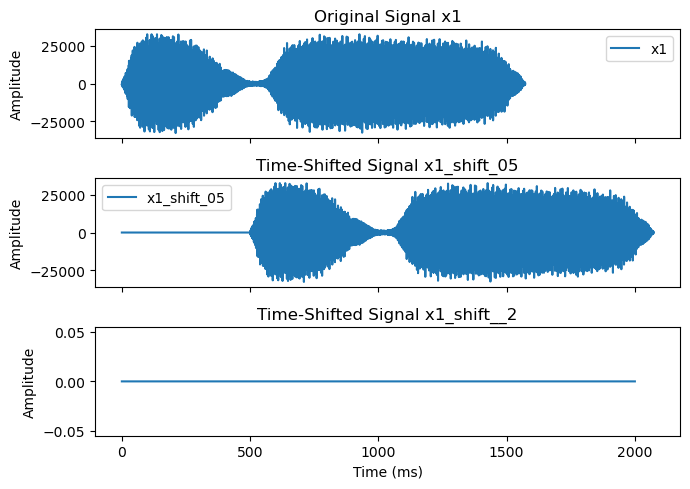

In [18]:
# Part B: Creating and Ploting

# unshifted signal
x1, t_x1 = timeshift(x1, fs1, 0)

# shifted signals
x1_shift_05, t_x1_shift_05 = timeshift(x1, fs1, 0.5)
x1_shift_m2, t_x1_shift_m2 = timeshift(x1, fs1, -2)

# Plotting

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7, 5))

# Plot x1
axs[0].plot(t_x1 * 1000, x1, label='x1')
# Add title and axis labels
axs[0].set_title('Original Signal x1')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Plot x1_shift_05
axs[1].plot(t_x1_shift_05 * 1000, x1_shift_05, label='x1_shift_05')
# Add title and axis labels
axs[1].set_title('Time-Shifted Signal x1_shift_05')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# Plot x1_shift__2
axs[2].plot(t_x1_shift_m2 * 1000, x1_shift_m2, label='x1_shift_minus_2')
# Add title and axis labels
axs[2].set_title('Time-Shifted Signal x1_shift__2')
axs[2].set_xlabel('Time (ms)')
axs[2].set_ylabel('Amplitude')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# Part C: Playing Audio

wav.write('x1_shift_05.wav', fs1, x1_shift_05.astype(np.int16))
wav.write('x1_shift_m2.wav', fs1, x1_shift_m2.astype(np.int16))

play_audio('train32.wav')
play_audio('x1_shift_05.wav')
play_audio('x1_shift_m2.wav')

### Discussion

The current implementation works correctly when I don't want to shift the sound. It simply returns the same sound. However, if I try to shift the sound forward more than its actual length, like starting a 3-minute song 5 minutes in advance, the function doesn't behave as I'd expect. Instead of getting complete silence, which is what should happen if I start too late, it gives me the original sound with some extra silence at the end.

To fix this, I can modify the function to check if the shift is larger than the sound's length. If it is, the function should return a sound of the same length but filled with silence, effectively mimicking missing the entire sound because I started too late. This adjustment will make the function respond more logically in this scenario.